#### Domain: E-Commerce

Context: Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.

#### Objective
To make a recommendation system that recommends at least five(5)
new products based on the user's habits.

In [ ]:
import pandas as pd
electronics_df = pd.read_csv("Electronic_dataset.csv")

In [2]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
user_id      500000 non-null object
prod_id      500000 non-null object
ratings      500000 non-null float64
timestamp    500000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [3]:
electronics_df.head(10)

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800
5,A3DBD19DOV8NTS,B002TOJXIA,4.0,1322006400
6,A2PIF6JQQYOGPG,B00007E7JU,4.0,1246060800
7,A9QF7T2BLAU74,B00004T8N5,5.0,1052352000
8,A2F4OUYS6G6LM0,B00D4FXFGO,1.0,1392249600
9,A39Q0LE0OJ5PMF,B00269SXT8,5.0,1347926400


In [4]:
#timestamp column is not of use so dropping the column
electronics_df.drop(columns=['timestamp'],inplace=True)

In [5]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
user_id    500000 non-null object
prod_id    500000 non-null object
ratings    500000 non-null float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [6]:
electronics_df[electronics_df.duplicated()==True]

,user_id,prod_id,ratings


There are no duplicate ratings

In [7]:
electronics_df['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

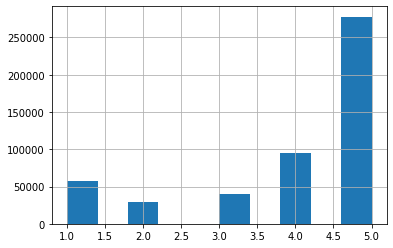

In [76]:
%matplotlib inline
electronics_df['ratings'].hist()

##### Ratings are on the scale 1 to 5
##### We see most of the users have given higher rating than lower ratings, which is good for giving recommendations

Most of the users have given higher ratings of 4 and 5

In [9]:
electronics_df['user_id'].value_counts()

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
                  ..
AKN5Y7Y3HJBQ5      1
AKLIQDYREO92G      1
AG43H1DIV9LTR      1
A82OXZSGOG33T      1
AQ9HZR9C7N17A      1
Name: user_id, Length: 448368, dtype: int64

There are lot of users who has rated more than 1 products

In [10]:
electronics_df['prod_id'].value_counts()

B0074BW614    1138
B00DR0PDNE    1094
B007WTAJTO     883
B0019EHU8G     774
B006GWO5WK     770
              ... 
B00AOJD0EA       1
B00ADPFQ4C       1
B005QXX378       1
B00CVTPDB4       1
B0016P48UQ       1
Name: prod_id, Length: 130138, dtype: int64

Each product is rated by lot of users

In [11]:
electronics_df['ratings'].isna().sum()

0

In [12]:
electronics_df['user_id'].isna().sum()

0

In [13]:
electronics_df['prod_id'].isna().sum()

0

In [14]:
popular_ratings = pd.DataFrame(electronics_df.groupby(['prod_id'])['ratings'].mean().sort_values(ascending=False)).reset_index()

In [15]:
popular_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130138 entries, 0 to 130137
Data columns (total 2 columns):
prod_id    130138 non-null object
ratings    130138 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [16]:
popular_ratings.head()

,prod_id,ratings
0,BT008G3W52,5.0
1,B004AC52UC,5.0
2,B004AGJRMC,5.0
3,B004AGED3A,5.0
4,B004AFOK2U,5.0


#### Collaborative filtering

In [17]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
user_id    500000 non-null object
prod_id    500000 non-null object
ratings    500000 non-null float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [18]:
electronics_df[electronics_df['user_id']=='A1CMD08Z49PGKQ']

,user_id,prod_id,ratings
3033,A1CMD08Z49PGKQ,B00902SFC4,3.0
3468,A1CMD08Z49PGKQ,B003ES5ZSW,5.0
5324,A1CMD08Z49PGKQ,B009289F02,5.0
37455,A1CMD08Z49PGKQ,B007R5YDYA,5.0
123799,A1CMD08Z49PGKQ,B00FZ03CD2,5.0
155596,A1CMD08Z49PGKQ,B005HSG3JC,5.0
161129,A1CMD08Z49PGKQ,B0074BW614,5.0
185139,A1CMD08Z49PGKQ,B007WTAJTO,5.0
205351,A1CMD08Z49PGKQ,B003XIJ3MW,5.0
294927,A1CMD08Z49PGKQ,B002RCNX8K,5.0


In [19]:
electronics_df['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

In [20]:
user_rating_count = pd.value_counts(electronics_df['user_id'])
user_rating_count

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
                  ..
AKN5Y7Y3HJBQ5      1
AKLIQDYREO92G      1
AG43H1DIV9LTR      1
A82OXZSGOG33T      1
AQ9HZR9C7N17A      1
Name: user_id, Length: 448368, dtype: int64

In [21]:
ratings_gte_3 = electronics_df[electronics_df['user_id'].isin(user_rating_count[user_rating_count>=3].index)]
#ratings_gte_3 = electronics_df.head(35000)

In [22]:
ratings_gte_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30603 entries, 16 to 499985
Data columns (total 3 columns):
user_id    30603 non-null object
prod_id    30603 non-null object
ratings    30603 non-null float64
dtypes: float64(1), object(2)
memory usage: 956.3+ KB


In [23]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 5))

In [24]:
data=Dataset.load_from_df(ratings_gte_3[['user_id','prod_id','ratings']],reader)

In [25]:
type(data)

surprise.dataset.DatasetAutoFolds

In [26]:
data.df.head(25)

,user_id,prod_id,ratings
16,A36OQE3RAOO63J,B001CZ5BOW,5.0
26,A2HX3D3MPPASNS,B004I3VZM2,4.0
39,A15U8KHV4J5DIK,B002BH4QNC,2.0
64,A3PAYT2SQY7J3H,B002WR7VSS,5.0
67,A3MLSY6VS7AB8O,B001IBHF5S,5.0
125,A23M8B84K9TSBJ,B0017KMI66,5.0
178,A2HBOG4LVIY15L,B002WE6D44,5.0
199,A2Q67H3PJ12UD5,B0057AVXJA,4.0
214,AZNUHQSHZHSUE,B000FJEYZI,1.0
215,A16ZNJD6MHB7R7,B00007E7JU,5.0


#### KNNWithMeans for user based filtering

In [27]:
from surprise.model_selection import train_test_split

In [28]:
trainset, testset = train_test_split(data, test_size=.30,random_state=45)

In [29]:
from surprise import KNNWithMeans

In [30]:
algo=KNNWithMeans(k=5, sim_options={'name':'pearson_baseline','user_based':True})

In [31]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [32]:
#testset=trainset.build_anti_testset()

In [33]:
predictions = algo.test(testset)

In [34]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.2345


1.234450565157807

In [35]:
pred_pd = pd.DataFrame(predictions)

In [36]:
pred_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9181 entries, 0 to 9180
Data columns (total 5 columns):
uid        9181 non-null object
iid        9181 non-null object
r_ui       9181 non-null float64
est        9181 non-null float64
details    9181 non-null object
dtypes: float64(2), object(3)
memory usage: 358.8+ KB


In [37]:
pred_pd['uid'].value_counts()

A5JLAU2ARJ0BO     11
AGVWTYW0ULXHT     11
A4WEZJOIZIV4U     10
A2NOW4U7W3F7RI     9
A3OXHLG6DIBRW8     9
                  ..
A3N0Z0QVRS1PP9     1
A3U9M6GJGKW5D7     1
APGH1HCSUVLIE      1
A3IOMFM9VQNGGS     1
A3ATORX9LJWRUM     1
Name: uid, Length: 5786, dtype: int64

In [38]:
#Build function
def get_recommendations(userId, num):
    user_rec = pred_pd[pred_pd['uid']==userId][['uid','iid','r_ui','est']].sort_values(by='est',ascending=False).head(num)
    return user_rec

In [39]:
user_list = pred_pd['uid'].unique()

In [40]:
print(len(user_list))

5786


In [41]:
#Recommendations are available for 5786 users

In [42]:
j=0
for i in user_list:
    if j==0:
        output_df= get_recommendations(i,5)
        j=j+1
    else:
        output_df= output_df.append(get_recommendations(i,5))

In [43]:
#Now we have built the dataframe with 5 recommendations for the users in the test set
output_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 0 to 9172
Data columns (total 4 columns):
uid     9120 non-null object
iid     9120 non-null object
r_ui    9120 non-null float64
est     9120 non-null float64
dtypes: float64(2), object(2)
memory usage: 356.2+ KB


In [44]:
#Lets see the recommendations for one sample user
output_df[output_df['uid']=='A2HX3D3MPPASNS']

,uid,iid,r_ui,est
845,A2HX3D3MPPASNS,B008Z0F3FY,5.0,4.22771
5736,A2HX3D3MPPASNS,B008V5NVU2,5.0,4.22771


#### Here we see the recommendations contain the list of products that are already rated by the user only. This is because we have not built the anti test set

### Now lets try with anti test

In [45]:
ratings_new = electronics_df[electronics_df['user_id'].isin(user_rating_count[user_rating_count>=3].index)].head(100)

In [46]:
ratings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 16 to 1731
Data columns (total 3 columns):
user_id    100 non-null object
prod_id    100 non-null object
ratings    100 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


In [47]:
data_new=Dataset.load_from_df(ratings_new[['user_id','prod_id','ratings']],reader)

In [48]:
trainset_new, testset_new = train_test_split(data_new, test_size=.30,random_state=45)

In [49]:
algo2=KNNWithMeans(k=5, sim_options={'name':'pearson_baseline','user_based':True})

In [50]:
algo2.fit(trainset_new)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [51]:
testset2=trainset_new.build_anti_testset()

In [52]:
predictions_2 = algo.test(testset2)

In [53]:
accuracy.rmse(predictions_2)

RMSE: 0.9024


0.9024311503818918

#### We see that the RMSE value is decreased in this case

In [54]:
pred_pd2 = pd.DataFrame(predictions_2)

In [55]:
pred_pd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 5 columns):
uid        4760 non-null object
iid        4760 non-null object
r_ui       4760 non-null float64
est        4760 non-null float64
details    4760 non-null object
dtypes: float64(2), object(3)
memory usage: 186.1+ KB


In [56]:
pred_pd2['uid'].value_counts()

A8ULAPYGJ70PH     68
A2HBOG4LVIY15L    68
A16ZNJD6MHB7R7    68
A23M8B84K9TSBJ    68
AO4LJ777HXG8A     68
                  ..
A38DBH142MK1QH    68
AASS0HMUT6EDP     68
A50BV2I2ZRXJ5     68
A10U8DJAPJJI8I    68
A2I18AO597DSDI    68
Name: uid, Length: 70, dtype: int64

In [57]:
def get_recommendations_anti(userId, num):
    user_rec = pred_pd2[pred_pd2['uid']==userId][['uid','iid','r_ui','est']].sort_values(by='est',ascending=False).head(num)
    return user_rec

In [58]:
get_recommendations_anti('A2HX3D3MPPASNS',5)

,uid,iid,r_ui,est
68,A2HX3D3MPPASNS,B001CZ5BOW,3.957143,4.25
98,A2HX3D3MPPASNS,B001MSU1HG,3.957143,4.25
101,A2HX3D3MPPASNS,B0017KMI66,3.957143,4.25
69,A2HX3D3MPPASNS,B008CNZOJY,3.957143,4.25
104,A2HX3D3MPPASNS,B003LRAZY0,3.957143,4.25


In [64]:
ratings_new[ratings_new['user_id']=='A2HX3D3MPPASNS']

,user_id,prod_id,ratings
26,A2HX3D3MPPASNS,B004I3VZM2,4.0


#### This time we see the recommendations are new and doesnt contain any products that the user himself has already rated